In [5]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import Maze_env.wrappers.rewards as rw
import numpy as np
from DQN.training.basic import BaseTraining
from DQN.training.curriculum import CurriculumTraining
from DQN.agents.basic import BaseAgent
from DQN.agents.multihead import MultiHeadAgent
import DQN.models.base as base
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [6]:
dataset = md.Maze_dataset(20,(3,3),maze_type = 'dfs',)

In [7]:


dataset.show_maze(0)

<IPython.core.display.Javascript object>

In [8]:
%matplotlib notebook

# -- reward distribution for this agent -- #
rewards = rw.reward_dist(GOAL = 75.0,
                         SEE_GOAL = 0.05,
                         DONT_SEE_GOAL = -0.01,
                         NEW_PLACE = 0.05,
                         OLD_PLACE = -0.5,
                         GET_CLOSER = 7.0, 
                         GET_CLOSER_CONSTANT = 3.1,
                         GET_FARTHER = -0.00,
                         GET_FARTHER_CONSTANT = -0.1,
                         DIST = 0.0)

rewards = rw.reward_dist(GOAL = 100.0,
                         SEE_GOAL = 0.05,
                         DONT_SEE_GOAL = -0.01,
                         NEW_PLACE = 0.05,
                         OLD_PLACE = -0.5,
                         GET_CLOSER = 50.0, 
                         GET_CLOSER_CONSTANT = 50.0,
                         GET_FARTHER = -0.00,
                         GET_FARTHER_CONSTANT = -0.1,
                         DIST = 0.0)

# -- maze agent -- #
dist_function = {
    range(0,3) : 0,
    range(3,6): 1,
    range(6,100): 2
}


# --- maze agent with the type of mcurriculum = Trueodel --- #
maze_agent =MultiHeadAgent(base.MultiHead,
                               vision=3,
                               action_type='cardinal',
                               rewards_dist=rewards,
                               dist_paradigm='radius',
                               n_heads=3,
                               head_function=dist_function
                               )

# --- trainer of the agent --- #
train = CurriculumTraining(name = 'slimTest',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=10,
                              n_agents=1,
                              final_epsilon = 0.01,
                              gamma = 0.99,
                              tau = 0.001,
                               batch_size = 64,
                              n_frames = 500000,
                              lr = 0.005,
                              lr_heads=0.005,
                              lr_step_size=5000,
                              lr_head_step_size=2500,
                              lr_gamma = 0.98,
                              lr_head_gamma = 0.98,
                              l2_regular=0.1,
                              replay_buffer_size=100000,
                              replay_buffer_min_perc=0.01,
                              target_update=10000,
                              policy_update=1,
                              lambda_entropy=0.1,
                              beta = 0.4,
                              alpha = 0.6,
                              decay_total = 10000,
                              per = True,
                              curriculum_alpha=1.0,
                              curriculum_mu=1.0
                              )
train.train(test_agent=True,peak=False)
train.save()

----------------------------------
Basic epsilon decay scheduler:
Start epsilon: 1
End epsilon: 0.01
Decay total: 10000
Decay rate: 0.045821057655338844
starting mu: 1.0
mu rate: 0.0
alpha: 1.0
timer threshold: 3333.3333333333335
------------------------------
Group 0: Learning rate = 0.005
Group 1: Learning rate = 0.005
Group 2: Learning rate = 0.005
Group 3: Learning rate = 0.005
Group 4: Learning rate = 0.005
--------------------------------------
Variable learning rate scheduler:
Step size: 5000
Head Step size: 2500
Gamma: 0.98
Head Gamma: 0.98


<IPython.core.display.Javascript object>

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


Current Score: 0.108
 Increasing Level to 2
Increasing Distance to 5
 Increasing Level to 3
Increasing Distance to 99
Current Score: 0.064
cumulative reward: [10.89666667]
cumulative reward: [-7.04342593]
cumulative reward: [-8.93333333]
cumulative reward: [-8.88888889]
cumulative reward: [10.89]
----------------------------------

frame [10000:24333.333333333332] with loss 0.10949079692363739
Learning rate : 0.0049
Learning rate : 0.0049
Learning rate : 0.0047059599999999995
Learning rate : 0.0047059599999999995
Learning rate : 0.005
Epsilon: [0.01584163490206374, 0.0735190692071567, 0.34119291162192855]
Epsilon Level: 3
Start dist: 99
Current Score: 0.07
Current Score: 0.058
cumulative reward: [-8.93333333]
cumulative reward: [-8.875]
cumulative reward: [-8.93333333]
cumulative reward: [-8.88888889]
cumulative reward: [-8.93333333]
----------------------------------

frame [20000:24333.333333333332] with loss 0.3678891658782959
Learning rate : 0.0047059599999999995
Learning rate : 0.

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/training/basic.py:610: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = scores_df, x ='frame',y = 'score',ax = axe[1][1],palette='tab10')


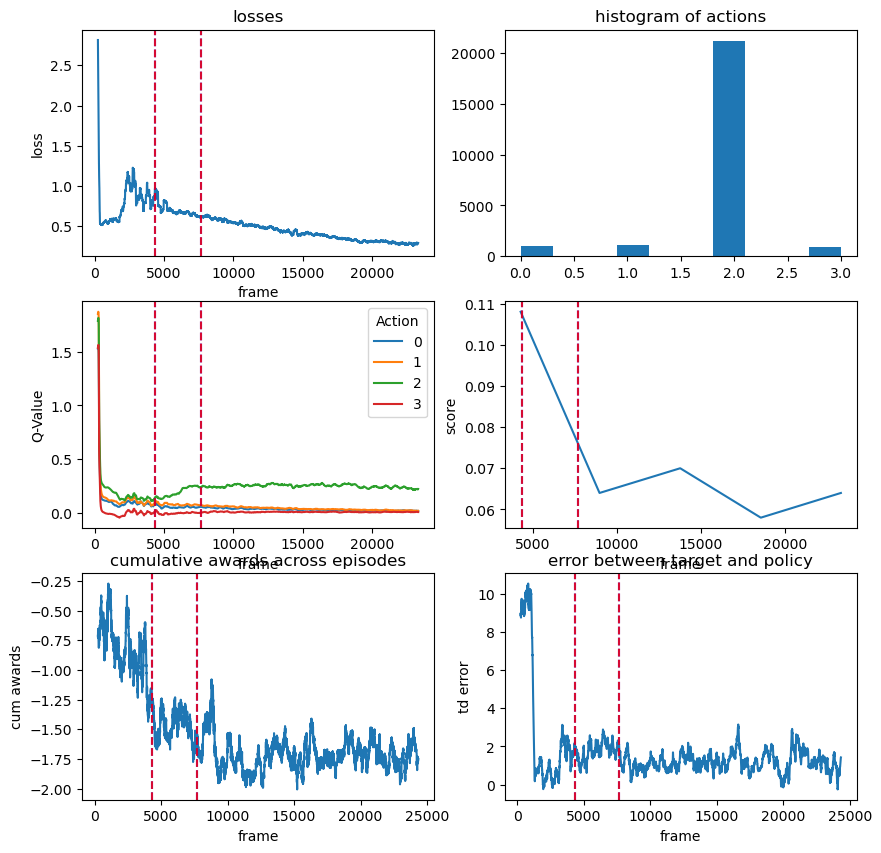

In [9]:
train.results()

In [10]:
train.agents.test_agent(dataset,n_episodes=1000,len_game=15,num_agents=1,start_dist=5)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


0.087

In [11]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
train.agents.run_agent(dataset[0],num_agents=1,len_game=15,epsilon=0,sample_prob=False,agents_pos=None,targets_pos=None)


cumulative reward: [-8.93333333]


In [12]:
import DQN.agents.basic as basic

load = basic.maze_agents.load('test1')

AttributeError: module 'DQN.agents.basic' has no attribute 'maze_agents'

In [9]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
testing_dataset = md.Maze_dataset(1,shape=(3,3),maze_type='percolation')

In [ ]:
load.run_agent(testing_dataset[0],len_game=15,n_episodes=1,agents_pos = None, targets_pos =None)

cumulative reward: [-11.55]


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [7]:
# Here we are going to take a recent model and try to use that as a starting
# point for training in a bigger arena.

%matplotlib notebook

# -- maze dataset -- #
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

# -- reward distribution for this agent -- #
rewards = rw.reward_dist(GOAL = 10.0,
                         SEE_GOAL = 0.6,
                         DONT_SEE_GOAL = -0.0,
                         NEW_PLACE = 5.0,
                         OLD_PLACE = -0.08,
                         GET_CLOSER = 0.5,
                         GET_FARTHER = -0.5,
                         DIST = 0.0)


# --- maze agent with the type of model --- #
maze_agent = basic.maze_agents.load('best_2x2_100%')

# --- trainer of the agent --- #
train = trainer.Maze_Training(name = 'test4',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=100,
                              n_agents=1,
                              gamma = 0.99,
                              tau = 0.001,
                               batch_size = 64,
                              n_frames = 100000,
                              lr = 0.0025,
                              lr_step_size=10000,
                              lr_gamma = 0.1,
                              replay_buffer_size=50000,
                              replay_buffer_min_perc=0.1,
                              target_update=1000,
                              policy_update=1,
                              lambda_entropy=0.4,
                              beta = 0.4,
                              alpha = 0.6,
                              decay = 0.9,
                              per = True
                              )
train.train(test_agent=True,peak=False,uniform_loc=True)
train.save()


<IPython.core.display.Javascript object>

frame 10000 with loss 139.1195068359375
cumulative reward: [0.74165958]
cumulative reward: [2.41977122]
cumulative reward: [0.5343688]
cumulative reward: [1.25721513]
cumulative reward: [1.01982972]
frame 20000 with loss 103.98388671875
frame 30000 with loss 218.9993896484375
cumulative reward: [2.68318204]
cumulative reward: [0.5343688]
cumulative reward: [1.64666667]
cumulative reward: [2.35284634]
cumulative reward: [2.41977122]
frame 40000 with loss 42.540687561035156
frame 50000 with loss 226.40924072265625
frame 60000 with loss 141.74012756347656
cumulative reward: [1.64666667]
cumulative reward: [2.35284634]
cumulative reward: [1.25721513]
cumulative reward: [1.64666667]
cumulative reward: [1.64666667]
frame 70000 with loss 45.16960525512695
frame 80000 with loss 384.1902770996094
frame 90000 with loss 349.89666748046875
frame 100000 with loss 781.2708129882812


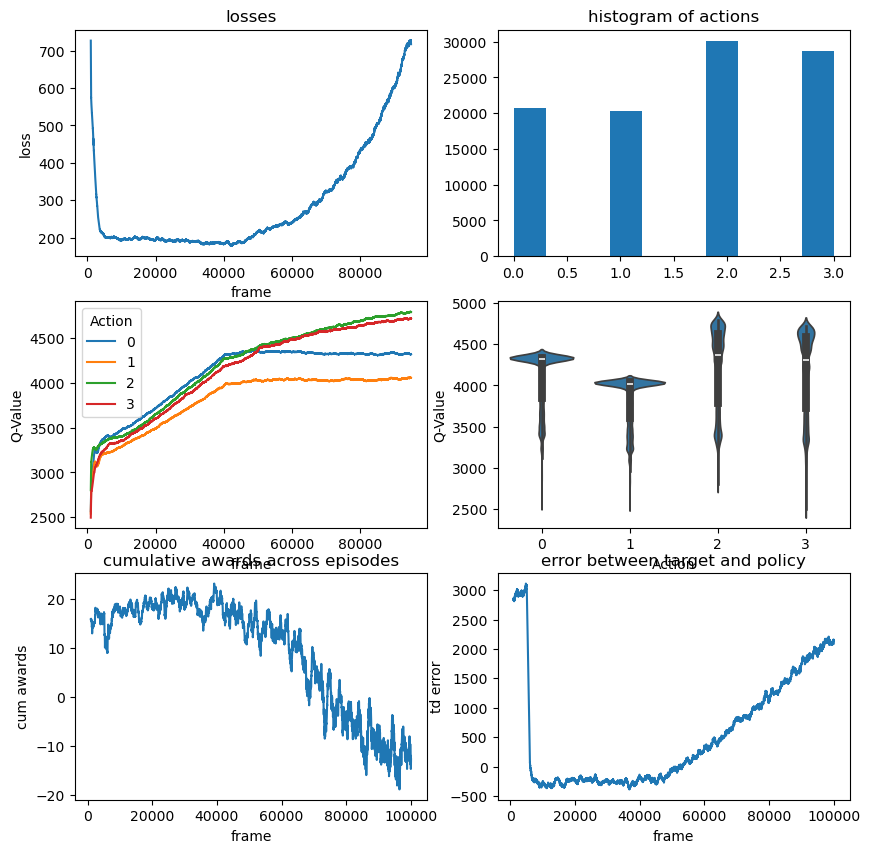

In [3]:
train.results()

In [4]:
train.agents.test_agent(dataset,n_episodes=1000,len_game=15,num_agents=1)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


0.365

In [ ]:
train.agents.run_agent(dataset[0],num_agents=1,len_game=15,epsilon=0,sample_prob=False,agents_pos=None,targets_pos=None)

KeyboardInterrupt: 